<a href="https://colab.research.google.com/github/husainattar/Rail-Rush/blob/master/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Importing the Required Lib and module

In [0]:
import cv2
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json

# Below import of colab can be removed only used in colab

from google.colab.patches import cv2_imshow
import time
import os



# Defining Function to load Model and normalize input data

In [0]:
def load_model():
    # Function to load and return neural network model 
    json_file = open('/content/drive/My Drive/Colab Notebooks/Model/Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/Model/model_A_weights.h5")
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    # print(path)
    #im = Image.open(path).convert('RGB')

    im=cv2.imread(path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)

    # im=cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
    # im = cv2.rotate(path, cv2.ROTATE_90_CLOCKWISE)

    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

In [0]:
# --------------------------------------------
# Making the model variable global and working
# Loading the Model Here
# Uncomment start , end & print for not not showing the loading the model time taken 
start = time.time() 

model = load_model()

end = time.time()
print(end-start)

# --------------------------------------











11.431751251220703


In [0]:

def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    # model = load_model()
    image = create_img(path)
    ans = model.predict(image)
    count = np.sum(ans)
    #cv2_imshow(image)
    return count,image,ans

In [0]:
def detect(path):
  ans,img,hmap = predict(path)
  return ans

# Video Evaluation  Code Specify the path properly for video
data is already generated for videos ==> Tester1 & Tester2 in directory data4 and data5 respc. so dont run the cell with optional comment Run it if new Video is given Input and create directory for the same

In [0]:

# Optional cell Tag
# Cell for Splitting the videos and storing as Image File in the specifed Directory.
# Uncomment start , end & print for not not showing the  time taken 

import cv2
import numpy as np
import os

max_value=0
min_value=100000
platform_max=0
img=1
#Frame creator function
def getFrame(sec):
    cap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = cap.read()
    if hasFrames:
      # global min_value
      # global platform_max
      # global max_value
      # global img
      # ans=detect(image)
      # # print(ans)
      # if img < 10:
      #   platform_max = ans if ans > platform_max else platform_max

      # min_value = ans if min_value > ans else min_value
      # max_value = ans if max_value < ans else max_value
      # img=img+1
      #detect(image)
      # ------------------------------

      # Here path of folder comes where we saves the Images  Here we used data4 folder for storing

        cv2.imwrite('/content/drive/My Drive/Colab Notebooks/data5/'+str(sec)+' sec.jpg', image)     # save frame as JPG file

      # -------------------------------
    return hasFrames

# Playing video from file:
start = time.time()

# Video path goes here the video which is going to tested

cap = cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/Train_dataset/Tester1.mp4')

sec = 0
frameRate = 1
#it will capture image in each 0.5 second
success = getFrame(sec)
while success:
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
cap.release()
cv2.destroyAllWindows()
end = time.time()
print(end - start)

In [0]:
# Path for the images goes here where we have saved it Here we saved in data4
# Run this Cell for creating the root
root='/content/drive/'

# ------------------------

In [0]:
# Run this cell for Collecting all the Image path 
# Modify the 'add' variable if new Directory is been used.
# Uncomment start , end & print for not not showing the  time taken 
import glob
start = time.time()

# ------------------------
# code to join path(optional if complete path not mentioned in root variable.)
add='My Drive/Colab Notebooks/data4'
getpath=os.path.join(root,add)
# -------------------------

# Prints total images found in the folder

# print(getpath)

path_sets=[getpath]
img_paths = []

for path in path_sets:
    
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        
        img_paths.append(str(img_path))
        
print("Total images : ",len(img_paths))
end = time.time()
print(end - start)


Total images :  51
0.6796128749847412


# Code for Calculating the Crowd 
Here all the paths of images of the input video is given as input for prediction 

In [0]:
# Uncomment start , end & print for not not showing the  time taken 
start = time.time()
img=1
max_value=0
min_value=100000
platform_max=0
# Main Processing of Images (Predicting part)
for img_path in img_paths:
  # print(img)
  ans=detect(img_path)

  if img < 10:
    platform_max = ans if ans > platform_max else platform_max

  min_value = ans if min_value > ans else min_value
  max_value = ans if max_value < ans else max_value

  img=img+1

# print("min :"+min_value+" max :"+max_value+" platform_max under 10sec :"+platform_max)
end = time.time()
print(end-start)

25.403130054473877


In [0]:
# Variable  which is to send for requirements.
# Important variable for Application
print("min value : ",min_value)

print("max value :",max_value)

print("platform value :",platform_max)


min value :  8.735024
max value : 52.836044
platform value : 19.359982


# **Evaluation for each Image**
change just the path and specify the image you want view with the proper directory.
Tester1.mp4 specify data4 , Tester2.mp4 specify data5

In [0]:
def detect2(path):
  ans,img,hmap = predict(path)
  return ans,img,hmap

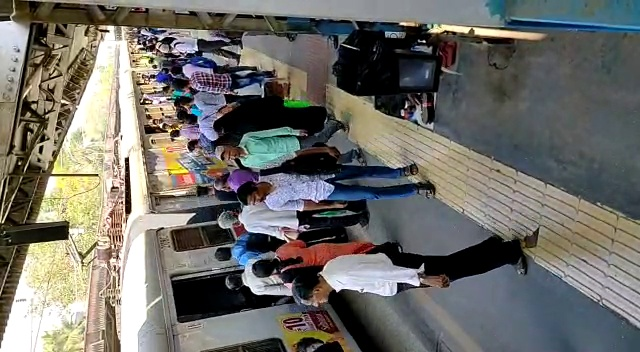

In [0]:
path='/content/drive/My Drive/Colab Notebooks/data4/27 sec.jpg'
img=cv2.imread(path)
cv2_imshow(img)
ans,img,hmap=detect2(path)

# Generates the ans & heatmap for specified image

34.503616


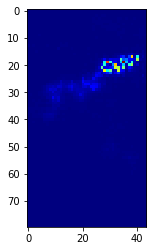

In [0]:

print(ans)
# # img=img[:,:,:]
# # print(img.shape)
# # img=img.reshape(img.shape[0],img.shape[1],img.shape[2])
# # #Print count, image, heat map
# plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
# # #plt.show()
# # cv2_imshow(img)
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()

# ----------------------

# Code for OS related problem39.986588

#try:
   # if not os.path.exists('data1'):
     #   os.makedirs('data1')
#except OSError:
   # print ('Error: Creating directory of data1')

# currentFrame = 0
# while(True):
#     # Capture frame-by-frame
    
#     ret, frame = cap.read()

    # Saves image of the current frame in jpg file
    
    # name = './data/frame' + str(currentFrame) + '.jpg'
    # print ('Creating...' + name)
    # cv2.imwrite(name, frame)

    # # To stop duplicate images
    # currentFrame += 1

# When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [0]:
# !pip freeze > requirement.txt

In [0]:
# !cat requirement.txt

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.1
asgiref==3.2.3
astor==0.8.1
astropy==4.0
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.4.0
boto==2.49.0
boto3==1.11.10
botocore==1.14.10
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==4.0.0
certifi==2019.11.28
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cvxopt==1.2.4
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
daft==0.0.4
dask==2.9.2
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.3
dlib==19.18.0
dm-sonnet==1.35
docopt==0.6.2
docu

In [0]:
# !tensorflow --version

/bin/bash: tensorflow: command not found
